<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-после-ознакомления-с-данными" data-toc-modified-id="Вывод-после-ознакомления-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод после ознакомления с данными</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.


# **Описание данных:**

| Признаки |    Интерпретация |
| :--- | :----------- |
| DateCrawled | - дата скачивания анкеты из базы |
| VehicleType | - тип автомобильного кузова |
| RegistrationYear | - год регистрации автомобиля |
| Gearbox     | - тип коробки передач |
| Power     | - мощность (л.с.) |
| Model | - модель автомобиля |
|Kilometer|- пробег (км)|
| RegistrationMonth     | - месяц регистрации автомобиля |
|FuelType|- тип топлива|
|Brand|- марка автомобиля|
|NotRepaired|- была машина в ремонте или нет|
| DateCreated | - дата создания анкеты |
|NumberOfPictures|- количество фотографий автомобиля|
|PostalCode|- почтовый индекс владельца анкеты (пользователя)|
|LastSeen|- дата последней активности пользователя|

| Целевой признак |    Интерпретация |
| :--- | :----------- |
| Price | - цена (евро) |

## Подготовка данных

In [1]:
# Импорт библиотек.
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# Импорт модулей IPython.
from IPython.display import display_html
from IPython.core.display import display, HTML
from IPython.display import display, Math, Latex
# Импорт модулей numpy
# from numpy.random import RandomState

# Импорт моделей.
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Импорт метрик и модулей sklearn.
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [2]:
try:
    autos = pd.read_csv('/datasets/autos.csv',sep=',')
    pd.set_option('display.max_columns', None)
    pd.options.mode.chained_assignment = None
except:
    autos = pd.read_csv('autos.csv',sep=',')
    pd.set_option('display.max_columns', None)
    pd.options.mode.chained_assignment = None

In [3]:
def info_row(df):
    '''
        Input: df - таблица pd.DataFrame.
        Output: None.
        Description: Функция первичного знакомства с данными.

    '''
    
    display(df.head(10))
    print('Общая информация:')
    display(df.info())
    print('Общая статистика:')
    display(df.describe())
    display(df.describe(include = ['object']))
    print('Дубликаты:')
    display(df.duplicated().sum())
    print(f'{df.duplicated().sum()/len(df):.1%}')
    print()
    print('Дубликаты по столбцам типа "object":')
    display(df[df.duplicated(subset=df.describe(include = ['object']).columns, keep=False)])
    print('Пропуски:')
    for col in df.columns:
        pct_missing = np.mean(df[col].isna())
        print('{} - {}%'.format(col, round(pct_missing*100,2)))
    print()
    print('Уникальные значения столбцов:')
    for row in df.columns:
        print('Уникальные значения столбца', row)
        print(df[row].unique())
    print()
    print('Heatmap корреляций:')
    plt.figure(figsize=(10, 10))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG') 
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);
    plt.show()
    print('Heatmap пропусков:')
    columns = df.columns[:]
    colours = ['#ADD8E6', '#FFFACD'] 
    plt.figure(figsize=(20, 20))
    sns.heatmap(df[columns].isnull(), cmap=sns.color_palette(colours))
    plt.show()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes:

None

Общая статистика:


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,271174,8,2,250,7,40,2,109,179150
top,2016-03-24 14:49:47,sedan,manual,golf,petrol,volkswagen,no,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,91457,268251,29232,216352,77013,247161,13719,17


Дубликаты:


4

0.0%

Дубликаты по столбцам типа "object":


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
5256,2016-04-01 15:38:34,5750,bus,1998,manual,102,transporter,150000,8,gasoline,volkswagen,no,2016-04-01 00:00:00,0,29227,2016-04-01 15:38:34
9100,2016-04-01 08:36:36,990,small,1997,manual,45,corsa,100000,3,petrol,opel,no,2016-04-01 00:00:00,0,82131,2016-04-07 05:15:40
18311,2016-03-07 12:00:46,10000,wagon,2013,manual,184,golf,60000,7,gasoline,volkswagen,no,2016-03-07 00:00:00,0,20359,2016-03-20 12:49:27
24813,2016-03-30 11:37:36,1999,sedan,2000,manual,105,golf,150000,1,petrol,volkswagen,no,2016-03-30 00:00:00,0,7554,2016-04-07 02:15:45
27083,2016-03-30 11:37:36,1850,sedan,1997,manual,75,golf,150000,12,petrol,volkswagen,no,2016-03-30 00:00:00,0,91301,2016-04-07 02:15:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330209,2016-03-20 20:45:44,19950,wagon,2012,manual,120,a4,80000,12,gasoline,audi,no,2016-03-20 00:00:00,0,95448,2016-04-07 05:16:18
338714,2016-04-03 10:37:45,1990,wagon,1998,manual,195,passat,150000,9,petrol,volkswagen,no,2016-04-03 00:00:00,0,99880,2016-04-07 11:17:12
340361,2016-04-01 19:56:42,10500,sedan,2010,manual,102,a3,150000,9,petrol,audi,no,2016-04-01 00:00:00,0,83125,2016-04-05 16:45:50
341463,2016-03-31 14:38:38,6500,sedan,2011,manual,140,golf,150000,2,gasoline,volkswagen,no,2016-03-31 00:00:00,0,68309,2016-03-31 14:38:38


Пропуски:
DateCrawled - 0.0%
Price - 0.0%
VehicleType - 10.58%
RegistrationYear - 0.0%
Gearbox - 5.6%
Power - 0.0%
Model - 5.56%
Kilometer - 0.0%
RegistrationMonth - 0.0%
FuelType - 9.28%
Brand - 0.0%
NotRepaired - 20.08%
DateCreated - 0.0%
NumberOfPictures - 0.0%
PostalCode - 0.0%
LastSeen - 0.0%

Уникальные значения столбцов:
Уникальные значения столбца DateCrawled
['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-21 09:50:58' '2016-03-14 17:48:27' '2016-03-19 18:57:12']
Уникальные значения столбца Price
[  480 18300  9800 ... 12395 18429 10985]
Уникальные значения столбца VehicleType
[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Уникальные значения столбца RegistrationYear
[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1982 1976 1983 1973 1111 1969 1971
 1987 1986 1988 1970 1965 1945 1925 1974 1979

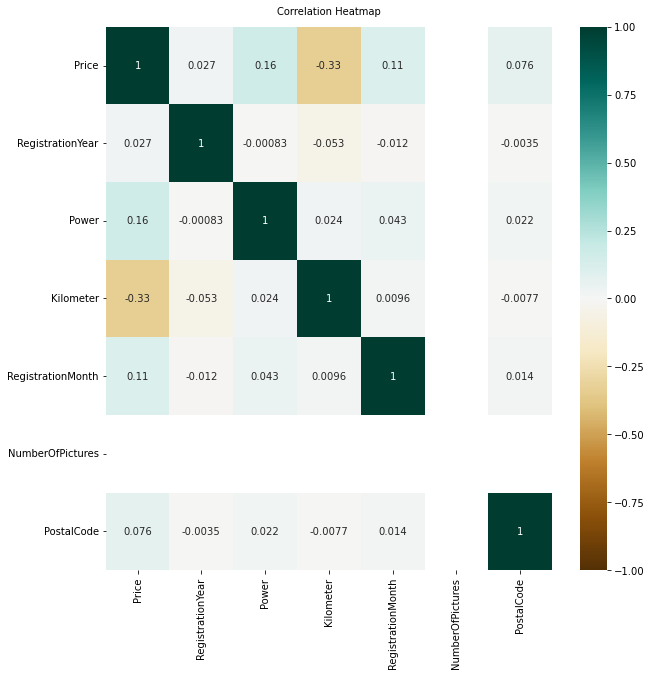

Heatmap пропусков:


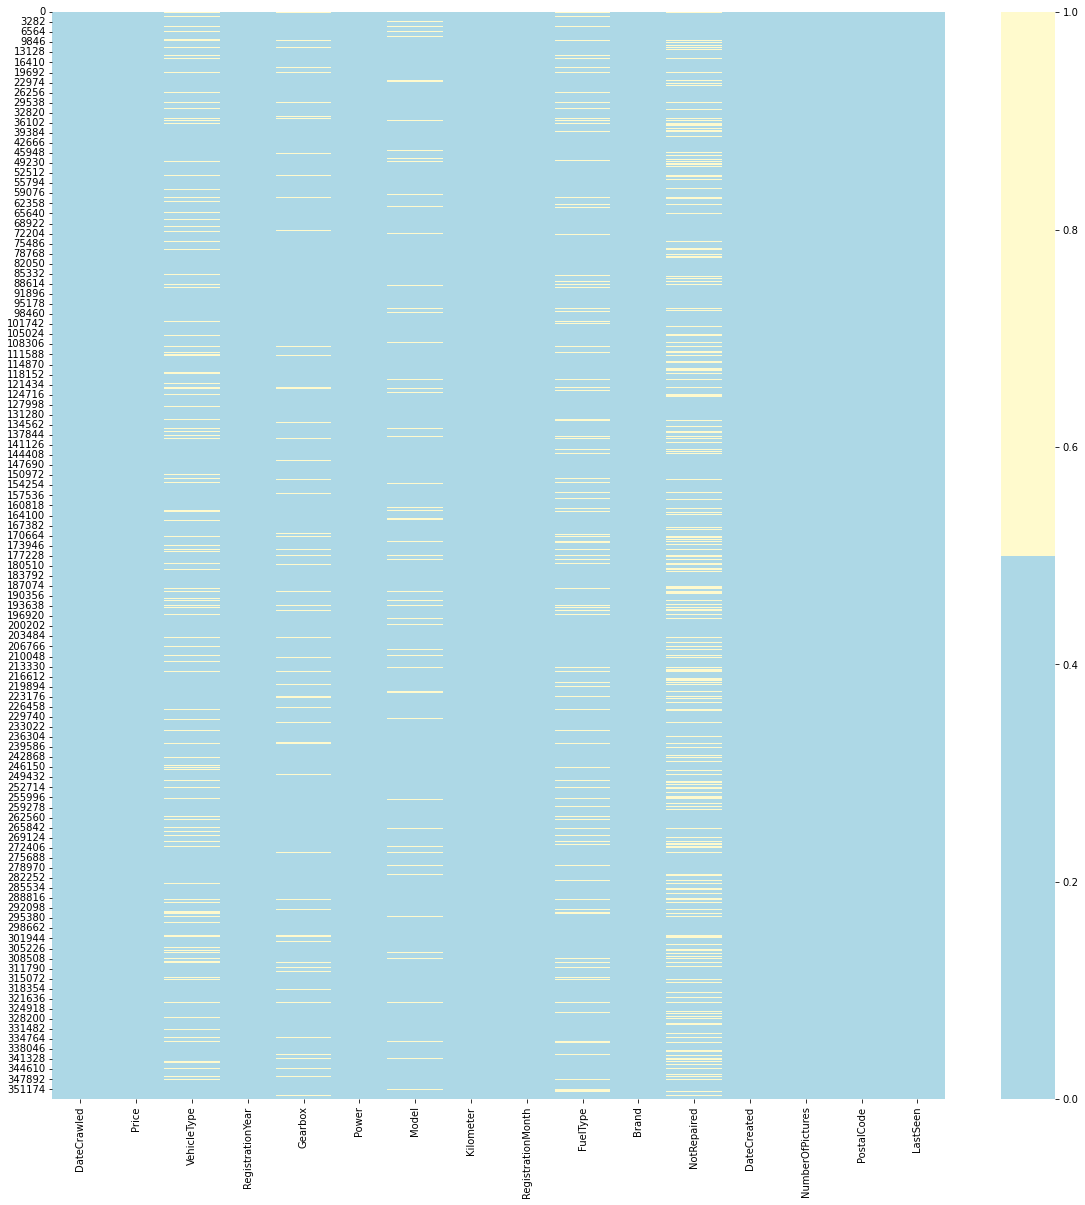

In [4]:
info_row(autos)

### Вывод после ознакомления с данными

После знакомства, с предоставленными данными, наметим план по их предобработке.  
Выявилось следующее:

1) **Колонки признаков, никак не влияющих на работу модели:**

| Название колонки |    Интерпретация |
| :--- | :----------- |
| DateCrawled | - дата скачивания анкеты из базы |
| RegistrationMonth     | - месяц регистрации автомобиля |
| DateCreated | - дата создания анкеты |
|NumberOfPictures|- количество фотографий автомобиля|
|PostalCode|- почтовый индекс владельца анкеты (пользователя)|
|LastSeen|- дата последней активности пользователя|

    От данных колонок необходимо избавиться. Это так же ускорит время обучения модели и получения результатов.\
2) **Целевой признак `Price` содержит нулевые значения.**\
>Так как у нас нет возможности восстановить эти данные, а нулевые значения могут повлиять на работу модели, то их необходимо удалить из всей выборки.

3) **Пропуски данных в значимых признаках:**\

| Название колонки |    Интерпретация |
| :--- | :----------- |
| VehicleType | - тип автомобильного кузова |
| Gearbox     | - тип коробки передач |
| Model | - модель автомобиля |
|FuelType|- тип топлива|
|NotRepaired|- была машина в ремонте или нет|


* Ввиду того, что в колонках `VehicleType`, `Model` и `FuelType` имеется значение `other`, все пропущенные значения в данных столбцах присвоим ему.\
* Пропуски в  колонке `Gearbox` могут быть обусловлены разными причинами, возможно коробка роботизированная или механическая и клиент просто не указал это. В таком случае, учитывая невозможность их восстановления по имеющимся данным, а так же за неимением возможности связаться с заказчиком, для уточнения, оставим их заполненными специальным значением `unknown`.
* Количество пропусков в колонке `NotRepaired` довольно значимое (и составляет 20%), причины их появления могут быть так же разными(машина не была в ремонте и клиент оставил пропуск; клиент намеренно не указал эти данные, ввиду желания скрыть эту информацию...). Так же заменим пропуски специальным значением - `unknown`.

4) **В данных так же обнаружены выбросы в колонках:**

| Название колонки |    Интерпретация |
| :--- | :----------- |
| RegistrationYear | - год регистрации автомобиля |
| Power     | - мощность (л.с.) |

* Примерный план по удалению выбросов из `RegistrationYear`, обоснуем следующим:
Первый из представленных брэндов компания `Форд` была зарегистрирована в 1906г, а первый в мире автомобиль был создан в 1886г. Все автомобили данной марки (в выборке), с датой регистрации указанной ранее 1910г - были зарегистрированы ранее даты создания первого автомобиля(что невозможно). Так же дела обстоят и с объединенным критерием `sonstige_autos`(другие автомобили). Поэтому все объявления с авто, зарегистрированными ранее 1910г необходимо удалить из колонки `RegistrationYear`. Так же необходимо удалить все объявления с датой регистрации авто, которая превосходит максимальную дату скачивания анкеты из базы (2016-04-07 14:36:58).  
* Что же касается выбросов в колонке `Power`:
Самым маломощным автомобилем является Peel P50 (мощность 4,2 л.с.), а самым мощным (на 2016 год) являлся Bugatti Chiron (мощность 1500 л.с.), ввиду того, что такие машины стоили гораздо больше 20 000 евро, ограничимся мощностью в 500 л.с. Поэтому удалим все, что выше и ниже этих данных. 

5) В данных имеются дубликаты.

### Предобработка

1) Удалим дубликаты

In [5]:
autos.drop_duplicates(keep='first', inplace=True, ignore_index=False)
autos.drop_duplicates(subset=autos.describe(include = ['object']).columns,
                      keep='first', inplace=True, ignore_index=False)
autos = autos.reset_index(drop=True)

In [6]:
autos.shape

(354332, 16)

2) Удалим невлияющие на работу модели признаки

In [7]:
autos = autos.drop(['DateCrawled','RegistrationMonth','DateCreated','NumberOfPictures','PostalCode','LastSeen'], axis=1)

3) Удалим нулевые значения целевого признака

In [8]:
print('Количество данных с целевым признаком Price равным нулю', ((autos['Price'] == 0).sum()*100)//len(autos),'%')

Количество данных с целевым признаком Price равным нулю 3 %


In [9]:
autos = autos.query("Price != 0").reset_index(drop=True)

4) Заменим пропуски в колонках `VehicleType`, `Model` и `FuelType` на значение `other`

In [10]:
autos['VehicleType'] = autos['VehicleType'].fillna('other')
autos['Model'] = autos['Model'].fillna('other')
autos['FuelType'] = autos['FuelType'].fillna('other')

5) Заменим пропуски в колонках `Gearbox` и `NotRepaired` нетипичным значением `unknown`

In [11]:
autos['Gearbox'] = autos['Gearbox'].fillna('unknown')
autos['NotRepaired'] = autos['NotRepaired'].fillna('unknown')

6) Удалим выбросы из колонок `RegistrationYear` и `Power`

In [12]:
def emissions(row,min_row,max_row,step,title_row, f_title, s_title):
    '''
        Input: row - таблица pd.Serios, min_row - int(минимальная граница графика), max_row - int(максимальныя граница),
               title_row, f_title, s_title - str(наименования осей и титул графика)
        Output: None.
        Description: Функция подсчитывает количество данных менее минимального и более максимального значений,
                     а так же выводит гистограмму и боксплот.

    '''
    
    count_min = 0
    count_max = 0
    percent_list = []
    index_list = [f'Выбросы меньше {min_row}', f'Выбросы больше {max_row -1}', 'Суммарные выбросы']
    
    # Графический блок.
    fig = plt.figure(figsize=(15, 6))
    ax1 = plt.subplot(1, 2, 1)
    ax1 = row.plot(kind='hist', bins=((max_row-min_row)//2), range=(min_row,max_row), 
                                         title=title_row, grid=True)
    ax1.set_xlabel(f_title)
    ax1.set_ylabel(s_title)
    major_ticks_ax1 = range(min_row, max_row, step)
    ax1.set_xticks(major_ticks_ax1)
    ax2 = plt.subplot(1, 2, 2)
    ax2 = row.plot(kind='box',title=title_row,grid=True)
    plt.ylim(min_row, max_row)
    major_ticks_ax2 = range(min_row, max_row, step)
    ax2.set_yticks(major_ticks_ax2)

    ax1.grid(True,which='major', alpha=0.5)
    ax2.grid(True,which='major', alpha=0.5)
    
    # Подсчет количества выбросов.
    count_min = (row <= min_row).sum()
    count_max = (row >= max_row).sum()
    
    percent_list.extend([(count_min*100)/len(row),(count_max*100)/len(row), ((count_min + count_max)*100)/len(row)])
    
    percent_df = pd.DataFrame(np.array(percent_list), index=[index_list], columns=[title_row])
    display(percent_df.round(3))  

,Год регистрации автомобиля
Выбросы меньше 1910,0.032
Выбросы больше 2016,4.011
Суммарные выбросы,4.042


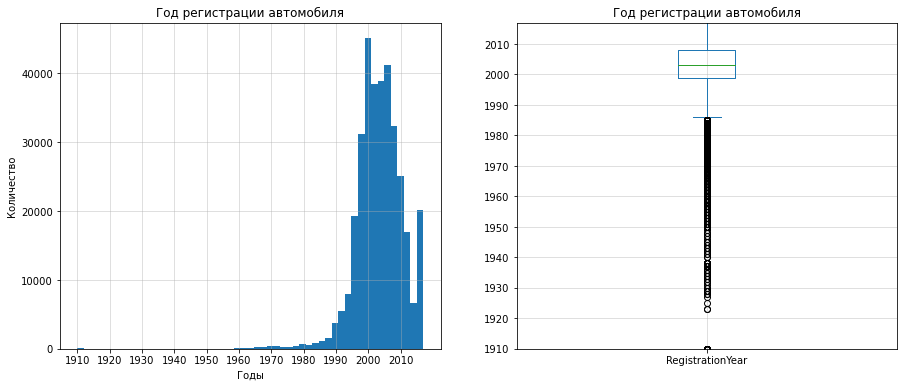

In [13]:
emissions(autos['RegistrationYear'],1910,2017,10,'Год регистрации автомобиля','Годы','Количество')

,Мощность автомобиля
Выбросы меньше 0,10.583
Выбросы больше 499,0.135
Суммарные выбросы,10.718


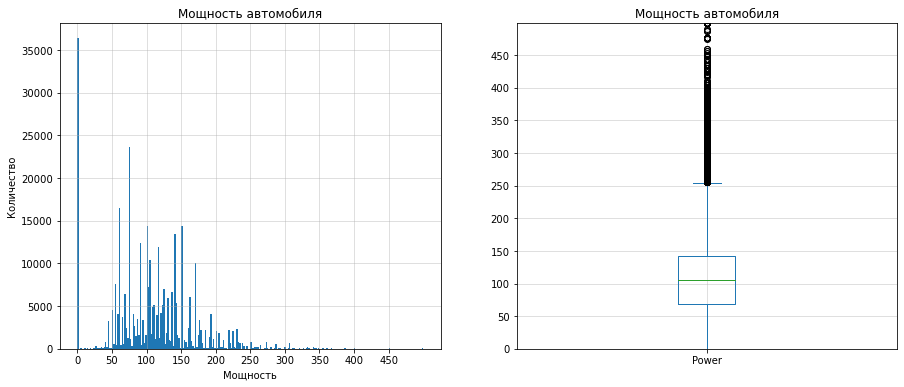

In [14]:
emissions(autos['Power'],0,500,50,'Мощность автомобиля','Мощность','Количество')

На графиках отчетливо видны всплески. В колонке `RegistrationYear` - в районе значения 2016, а в колонке `Power` - всплеск в нулевых значениях мощности двигателя.\
Выбросов в `RegistrationYear` относительно не много, поэтому мы их спокойно удалим. А вот  в колонке `Power` значений, равных нулю, достаточно много, поэтому, во избежании потери приличного количества данных, мы их заменим медианой мощности отностительно аналогичных моделей машин по колонке `Model`.

In [15]:
autos = autos.query("1910 <= RegistrationYear <= 2016 & Power <= 500")
autos['Power'] = autos['Power'].replace(0).fillna(autos.groupby('Model')['Power'].transform('median'))
autos = autos.query(" 4<= Power").reset_index(drop=True)

In [16]:
autos.shape

(329287, 10)

### Вывод  
План по предобработке выполнен:
1) Удалены дубликаты\
2) Удалены не влияющие на работу модели признаки\
3) Удалены нулевые значения целевого признака `Price`\
4) Заменены пропуски в колонках `VehicleType`, `Model` и `FuelType` на значение `other`\
5) Пропуски в колонках `Gearbox` и `NotRepaired` заменены нетипичным значением `unknown`\
6) Удалены выбросы из колонок `RegistrationYear` и `Power`, при этом сохранена значительная часть данных.\
План выполнен полностью, при этом потеря данных составила 7% выборки.

### Подготовка данных

Ввиду того, что данных преобладают категориальные признаки, да еще и с большим количетсвом значений. Для их преобразования, наиболее предпочтительным будет метод порядкового кодирования `Ordinal Encoding`.   
* Данный метод позволит нам не создавать огромное количество дополнительных колонок, что сильно бы сказалось на работе моделей.
* Но в тоже время, данная методика не подходит для моделей логистической регрессии.\
В так случае создадим две функции подготовки данных:
>В первой применим метод `Ordinal Encoding`\
Во второй - `One-Hot Encoding`\
И сравним результаты


In [17]:
def preparation_ord(df):
    '''
    Input: feathers - таблица  (pd.DataFrame).
    Output: features,target, features_train, features_test, target_train, target_test, num, cat -
            признаки, целевой признак, признаки и целовой признак обучающей и тестовой выборок, 
            списки численных и категориальных колонок
    Description: 1) Функция формирует список с названиями колонок численных признаков.
                 2) Преобразует категориальные признаки в численные порядковым кодированием.
                 3) Разбивает выборку на целевой признак и признаки.
                 4) Выделяет обучающую и тестовые выборки.
                 5) Масштабирует численные признаки

    '''
    num = []
    cat = []
    # Формируем список с названиями колонок численных признаков. 
    num = list(df.select_dtypes(exclude = 'object'))
    num.remove('Price')
    cat = list(df.select_dtypes(include = 'object'))
    
    # Преобразуем категориальные признаки в численные.
    encoder = OrdinalEncoder() 
    encoder.fit(df[cat])
    df_ordinal = pd.DataFrame(encoder.transform(df[cat]), columns=df[cat].columns)
    final_df = df.drop(columns = cat).join(df_ordinal)

    # Разбиваем выборку на целевой признак и признаки. 
    features = final_df.drop('Price', axis=1)
    target = final_df['Price']   
                 
    # Выделяем обучающую и тестовые выборки.
    features_train, features_test, target_train, target_test = train_test_split(
        features, target, train_size=0.75,random_state=12345)
    
    # Масштабируем численные признаки
    scaler = StandardScaler()
    scaler.fit(features_train[num]) 
    features_train[num] = scaler.transform(features_train[num])
    features_test[num] = scaler.transform(features_test[num])

    return features,target,features_train, features_test, target_train, target_test, num, df_ordinal

In [18]:
%%time
features,target,features_train, features_test, target_train, target_test, num, df_ordinal = preparation_ord(autos)

Wall time: 566 ms


In [19]:
def preparation_ohe(df):
    '''
    Input: feathers - таблица  (pd.DataFrame).
    Output: features,target, features_train, features_test, target_train, target_test, num, cat -
            признаки, целевой признак, признаки и целовой признак обучающей и тестовой выборок, 
            списки численных и категориальных колонок
    Description: 1) Функция преобразует категориальные признаки в численные методом One-Hot Encoding.  
                 2) Разбивает выборку на признаки и целевой признак.
                 3) Формирует списки с названиями колонок численных и категориальных признаков.
                 4) Выделяет обучающую и тестовые выборки.
                 5) Масштабирует численные признаки

    '''
    num = []
    cat = []
    
    num = list(df.select_dtypes(exclude = 'object'))
    num.remove('Price')
    cat = list(df.select_dtypes(include = 'object'))
    
    # Преобразуем категориальные признаки.
    df_ohe = pd.get_dummies(df,drop_first=True)
        
    # Разбиваем выборку на целевой признак и признаки. 
    features = df_ohe.drop('Price', axis=1)
    target = df_ohe['Price']

    # Выделяем обучающую и тестовые выборки.
    features_train, features_test, target_train, target_test = train_test_split(
        features, target, train_size=0.75,random_state=12345)
    
    # Масштабируем числовые признаки.
    scaler = StandardScaler()
    scaler.fit(features_train[num]) 
    features_train[num] = scaler.transform(features_train[num])
    features_test[num] = scaler.transform(features_test[num])

    return features,target,features_train, features_test, target_train, target_test, num, cat

In [20]:
%%time
features_o,target_o,features_train_o, features_test_o, target_train_o, target_test_o, num_o, cat_o  = preparation_ohe(autos)

Wall time: 1.13 s


## Обучение моделей

In [21]:
# Создадим словарь для результатов тестирования.
rmse_dict = {}

In [22]:
def params_grid(model,params,scoring,features,target):
    '''
    Input: model - обучаемая модель, params - набор параметров модели, scoring -метрика оценки ошибки,
           features,target - признаки и целевой признак обучающей выборки.
    Output: model_grid,best_params,best_score - модель, ее лучшие параметры и 
            наименьшее значение метрики оценки ошибки
    Description: Функция ищет лучшие параметры из диапазона переданного в аргумент, 
                 для принимаемой в аргумент модели

    '''
    model_grid = GridSearchCV(model,params,cv=5, n_jobs=-1,scoring=scoring, verbose=2)
    model_grid.fit(features,target)
    best_params = model_grid.best_params_
    best_score = model_grid.best_score_
    return model_grid,best_params,best_score

### LinearRegression
Обучим две модели в соответствующей каждому типу кодирования и посмотрим на результаты.\
Начнем с модели использующей данные после кодирования `OrdinalEncoder`.

In [23]:
%%time
model_lr_ord = LinearRegression()
rmse_lr_ord = cross_val_score(LinearRegression(),
                                          features_train,
                                          target_train,
                                          cv=5, scoring='neg_root_mean_squared_error').min()
rmse_lr_ord = rmse_lr_ord *(-1)
display(HTML(f"<font color='blue'>RMSE LinearRegression методом OrdinalEncoder:\
{rmse_lr_ord:.3f}</font>"))

Wall time: 285 ms


Посмотрим, как поведет себя `LinearRegression` на данных, преобразованных методом `One-Hot Encoding`.

In [24]:
%%time
model_lr_ohe = LinearRegression()
rmse_lr_ohe = cross_val_score(LinearRegression(),
                                          features_train_o,
                                          target_train_o,
                                          cv=5, scoring='neg_root_mean_squared_error').min()
rmse_lr_ohe = rmse_lr_ohe *(-1)
display(HTML(f"<font color='blue'>RMSE LinearRegression методом One-Hot Encoding:\
{rmse_lr_ohe:.3f}</font>"))

Wall time: 22.3 s


In [41]:
# Занесем результаты в словарь
rmse_dict['LinearRegression'] = [rmse_lr_ord, rmse_lr_ohe,0,0.0285,22.3,0]

###  DecisionTreeRegressor
Оценить модели решающего дерева.

In [26]:
tree_params = {'max_depth': range(1,8,1)}
tree_model = DecisionTreeRegressor(random_state=12345)

In [27]:
%%time
tree_grid_ord = params_grid(tree_model,tree_params,'neg_root_mean_squared_error',features_train,target_train)
tree_grid_ord
display(HTML(f"<font color='blue'>RMSE DecisionTreeRegressor методом OrdinalEncoder:\
{tree_grid_ord[2]:.3f}</font>"))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


Wall time: 5.35 s


In [28]:
%%time
tree_grid_ohe = params_grid(tree_model,tree_params,'neg_root_mean_squared_error',features_train_o,target_train_o)
tree_grid_ohe
display(HTML(f"<font color='blue'>RMSE DecisionTreeRegressor методом One-Hot Encoding:\
{tree_grid_ohe[2]:.3f}</font>"))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


Wall time: 38.6 s


In [40]:
# Занесем результаты в словарь
rmse_dict['DecisionTreeRegressor'] = [tree_grid_ord[2]*(-1), tree_grid_ohe[2]*(-1),0, 5.35, 38.6,0]

### LightGBM 
Теперь посмотрим на результаты на модели Бустинга.

In [30]:
parameters_lgbm = {
          'objective': ['regression'],
          'max_depth': range(3,7,1),
          'learning_rate':np.arange(0.021,0.024,0.001),
          "boosting_type": ['gbdt'],
          "metric": ['rmse'],
          "verbosity": [1],
          'random_state': [12345],
          'n_estimators': range(380,481,50),        
    }


In [31]:
model_lgbm = LGBMRegressor()

Первая модель на данных после кодирования `OrdinalEncoder`.

In [32]:
%%time
lgbm_grid_ord = params_grid(model_lgbm,parameters_lgbm,'neg_root_mean_squared_error',features_train,target_train)
lgbm_grid_ord 
display(HTML(f"<font color='blue'>RMSE LGBMRegressor методом OrdinalEncoder:\
{lgbm_grid_ord[2]:.3f}</font>"))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 246965, number of used features: 9
[LightGBM] [Info] Start training from score 4606.609256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Wall time: 4min 36s


Вторая используем данные после кодирования `One-Hot Encoding`.

In [33]:
%%time
lgbm_grid_ohe = params_grid(model_lgbm,parameters_lgbm,'neg_root_mean_squared_error',features_train_o,target_train_o)
display(HTML(f"<font color='blue'>RMSE LGBMRegressor методом One-Hot Encoding:\
{lgbm_grid_ohe[2]:.3f}</font>"))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 246965, number of used features: 291
[LightGBM] [Info] Start training from score 4606.609256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

Wall time: 6min 3s


`LGBM` модель может обрабатывать категориальные принзаки сама, достаточно привести эти признаки к типу 'category'. Попробуем обучить ещё такой вариант модели.

In [37]:
category = list(autos.select_dtypes(include = 'object'))

for col in category:
    autos[col] = autos[col].astype('category')
    

# Разбиваем выборку на целевой признак и признаки. 
features = autos.drop('Price', axis=1)
target = autos['Price']



# Выделяем обучающую и тестовые выборки.
features_train_l, features_test_l, target_train_l, target_test_l = train_test_split(
    features, target, train_size=0.75,random_state=12345)

# Масштабируем числовые признаки
scaler = StandardScaler()
scaler.fit(features_train_l[num]) 
features_train_l[num] = scaler.transform(features_train_l[num])
features_test_l[num] = scaler.transform(features_test_l[num])

In [38]:
%%time
lgbm_grid_cat = params_grid(model_lgbm,parameters_lgbm,'neg_root_mean_squared_error',features_train_l,target_train_l)
display(HTML(f"<font color='blue'>RMSE LGBMRegressor переводом в category:\
{lgbm_grid_cat[2]:.3f}</font>"))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 246965, number of used features: 9
[LightGBM] [Info] Start training from score 4606.609256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Wall time: 4min 52s


In [39]:
# Занесем результаты в словарь.
rmse_dict['LGBMRegressor'] = [lgbm_grid_ord[2]*(-1), lgbm_grid_ohe[2]*(-1),lgbm_grid_cat[2]*(-1), 276,363,292]

### CatBoostRegressor

In [42]:
parameters_cat = {
          'depth': range(3,7,1),
          'learning_rate':np.arange(0.021,0.024,0.001),
          "loss_function": ['RMSE'],
          "verbose": [1],
          'random_state': [12345],
          'iterations': range(380,481,50)
          } 

In [43]:
model_cat = CatBoostRegressor()

CatBoostRegressor метод `OrdinalEncoder`

In [44]:
%%time
cat_grid_ord = params_grid(model_cat,parameters_cat,'neg_root_mean_squared_error',features_train,target_train)
cat_grid_ord
display(HTML(f"<font color='blue'>RMSE CatBoostRegressor методом OrdinalEncoder:\
{cat_grid_ord[2]:.3f}</font>"))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 4478.7706568	total: 151ms	remaining: 1m 12s
1:	learn: 4416.2752247	total: 170ms	remaining: 40.7s
2:	learn: 4353.5487423	total: 190ms	remaining: 30.1s
3:	learn: 4292.7519467	total: 208ms	remaining: 24.7s
4:	learn: 4234.9557616	total: 225ms	remaining: 21.4s
5:	learn: 4178.4795963	total: 250ms	remaining: 19.8s
6:	learn: 4124.7570843	total: 270ms	remaining: 18.3s
7:	learn: 4070.9147629	total: 289ms	remaining: 17s
8:	learn: 4016.9949574	total: 307ms	remaining: 16.1s
9:	learn: 3966.6743383	total: 325ms	remaining: 15.3s
10:	learn: 3916.2074659	total: 344ms	remaining: 14.7s
11:	learn: 3867.8470474	total: 366ms	remaining: 14.3s
12:	learn: 3823.1905580	total: 384ms	remaining: 13.8s
13:	learn: 3776.9191124	total: 401ms	remaining: 13.4s
14:	learn: 3733.3284573	total: 419ms	remaining: 13s
15:	learn: 3690.9100498	total: 435ms	remaining: 12.6s
16:	learn: 3648.7241198	total: 455ms	remaining: 12.4s
17:	learn: 3606.9481283	total: 47

Wall time: 15min 21s


CatBoostRegressor метод `One-Hot Encoding`

In [45]:
%%time
cat_grid_ohe = params_grid(model_cat,parameters_cat,'neg_root_mean_squared_error',features_train_o,target_train_o)
display(HTML(f"<font color='blue'>RMSE CatBoostRegressor методом One-Hot Encoding:\
{cat_grid_ohe[2]:.3f}</font>"))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 4477.8816671	total: 21.1ms	remaining: 10.1s
1:	learn: 4415.4569127	total: 40.4ms	remaining: 9.65s
2:	learn: 4352.4736093	total: 63.3ms	remaining: 10.1s
3:	learn: 4294.6403109	total: 82.7ms	remaining: 9.84s
4:	learn: 4237.9795223	total: 102ms	remaining: 9.72s
5:	learn: 4180.7543899	total: 121ms	remaining: 9.56s
6:	learn: 4124.1451986	total: 140ms	remaining: 9.43s
7:	learn: 4070.4759353	total: 157ms	remaining: 9.27s
8:	learn: 4017.4129295	total: 175ms	remaining: 9.15s
9:	learn: 3968.3460434	total: 194ms	remaining: 9.11s
10:	learn: 3917.0198088	total: 213ms	remaining: 9.07s
11:	learn: 3868.4447322	total: 232ms	remaining: 9.04s
12:	learn: 3820.5827385	total: 249ms	remaining: 8.95s
13:	learn: 3774.2438713	total: 268ms	remaining: 8.94s
14:	learn: 3730.7804176	total: 288ms	remaining: 8.94s
15:	learn: 3688.6798665	total: 307ms	remaining: 8.91s
16:	learn: 3646.4580901	total: 329ms	remaining: 8.96s
17:	learn: 3606.1363529	to

Wall time: 14min 10s


In [47]:
# Занесем результаты в словарь
rmse_dict['CatBoostRegressor'] = [cat_grid_ord[2]*(-1), cat_grid_ohe[2]*(-1),0,921,850,0]

## Анализ моделей

In [56]:
rmse_score = pd.DataFrame.from_dict(data=rmse_dict, columns=[
    'RMSE Ordinal', 
    'RMSE One-Hot',
    'RMSE category',
    'CV Ordinal(s)',
    'CV One-Hot(s)',
    'CV category(s)'
    ],
                                    orient='index')
rmse_score.style.background_gradient(cmap=sns.light_palette("skyblue", as_cmap=True))


,RMSE Ordinal,RMSE One-Hot,RMSE category,CV Ordinal(s),CV One-Hot(s),CV category(s)
LinearRegression,3108.988761,2742.978850,0.000000,0.028500,22.300000,0
DecisionTreeRegressor,2300.156752,2303.555144,0.000000,5.350000,38.600000,0
LGBMRegressor,1775.394448,1788.284760,1683.757724,276.000000,363.000000,292
CatBoostRegressor,1873.351208,1872.622917,0.000000,921.000000,850.000000,0


Проверка лучшей модели на тестовой выборке

In [51]:
lgbm_grid_cat

(GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
              param_grid={'boosting_type': ['gbdt'],
                          'learning_rate': array([0.021, 0.022, 0.023]),
                          'max_depth': range(3, 7), 'metric': ['rmse'],
                          'n_estimators': range(380, 481, 50),
                          'objective': ['regression'], 'random_state': [12345],
                          'verbosity': [1]},
              scoring='neg_root_mean_squared_error', verbose=2),
 {'boosting_type': 'gbdt',
  'learning_rate': 0.023000000000000003,
  'max_depth': 6,
  'metric': 'rmse',
  'n_estimators': 480,
  'objective': 'regression',
  'random_state': 12345,
  'verbosity': 1},
 -1683.7577235510266)

In [55]:
%%time

model_lgbm_cat = LGBMRegressor(
    
    boosting_type ='gbdt',
    learning_rate = 0.023,
    max_depth = 6,
    metric = 'rmse',
    n_estimators = 480,
    objective = 'regression',
    random_state = 12345,
    verbosity = -10,
    force_row_wise = True,
)
model_lgbm_cat.fit(features_train_l, target_train_l)

predicted_lgbm_cat = model_lgbm_cat.predict(features_test_l)
rmse_lgbm_cat = (mean_squared_error(target_test_l, predicted_lgbm_cat)) ** 0.5

display(HTML(f"<font color='blue'>RMSE LGBMRegressor методом category:\
{rmse_lgbm_cat:.3f}</font>"))

Wall time: 2.71 s


### Вывод
В ходе проделанной работы были проанализированы данные сервиса по продаже автомобилей.

* Проведена предобработка данных, по итогу которой  данные были очищены от выбросов и пропусков, а так же были удалены лишние признаки.
* Проведена подготовка данных двумя способами кодирования.
* По подготовленным данным были обучены следующие модели:
>Модель `LinearRegression`\
Модель `DecisionTreeRegressor`\
А так же две модели Бустинга:\
Модель `LGBMRegressor`\
Модель `CatBoostRegressor`.

* Модели обучались определению рыночной стоимости автомобилей, на основании исторических данных.\
* Для оценки качества моделей использовалась метрика `RMSE`.

* Учитывая значимые, для заказчика критерии:
>Качество предсказания\
Скорость предсказания\
Время обучения.

* Все необходимые данные были внесены в итоговую таблицу с результатами.
* На основании полученных данных выбрана самая точная модель: 
>`LGBMRegressor`
* Самая быстрая и точная модель(по результатам метрики RMSE и времени обучения):
>`DecisionTreeRegressor`	

* В целом, модели Бустинга более точны в своих оценках, нежели простые регрессоры, но подбор их параметров и обучение занимают гораздо большее время. Если опираться на качество предстказания модели, то места распределились бы так:
>`LGBMRegressor`\
`CatBoostRegressor`\
`DecisionTreeRegressor`\
`LinearRegression`
